In [1]:
!pip install dabl

     |████████████████████████████████| 563kB 5.7MB/s 
     |████████████████████████████████| 22.3MB 1.5MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
# for basic operations
import numpy as np 
import pandas as pd 

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# reading the data
data = pd.read_csv('/content/sample_data/dataset.csv')

# check the shape of the dataset
data.shape

(1460, 81)

Target looks like regression
Showing only top 10 of 22 continuous features


/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 2 outliers in column SalePrice.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 2 outliers in column GrLivArea.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 2 outliers in column TotalBsmtSF.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 3 outliers in column 1stFlrSF.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 2 outliers in column MasVnrArea.
  int(dropped), series.name), UserWarning)


Showing only top 10 of 44 categorical features


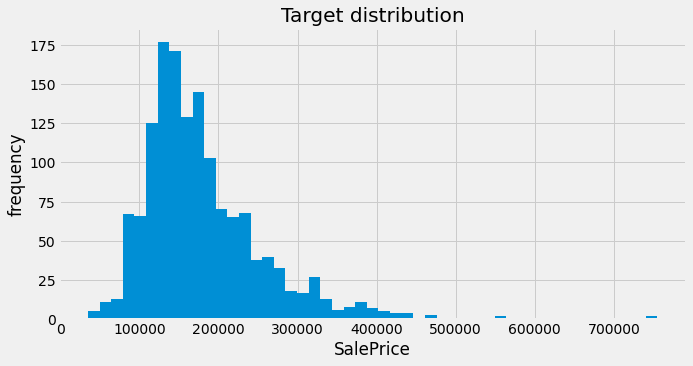

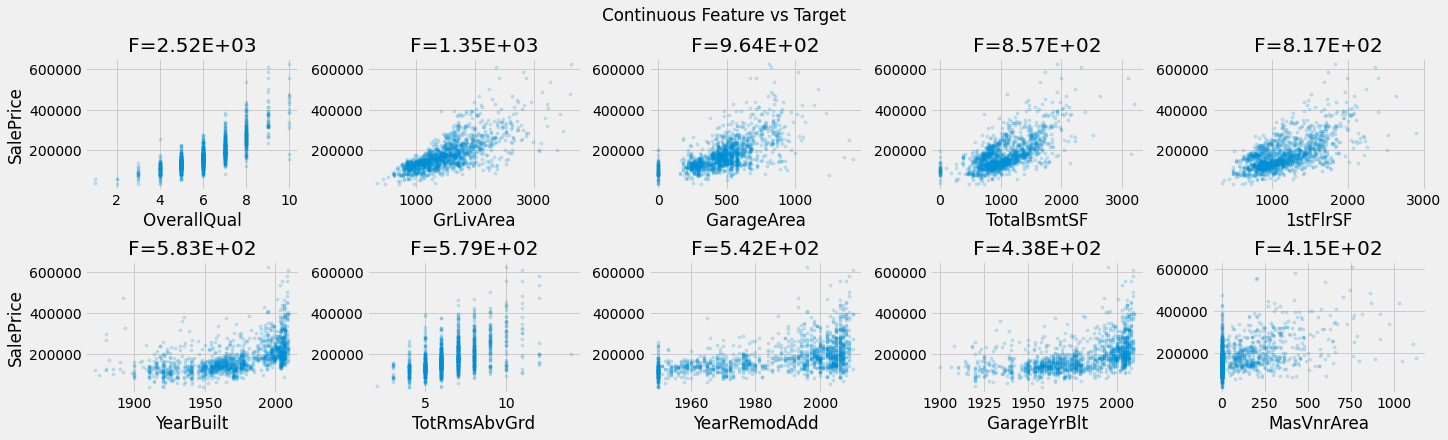

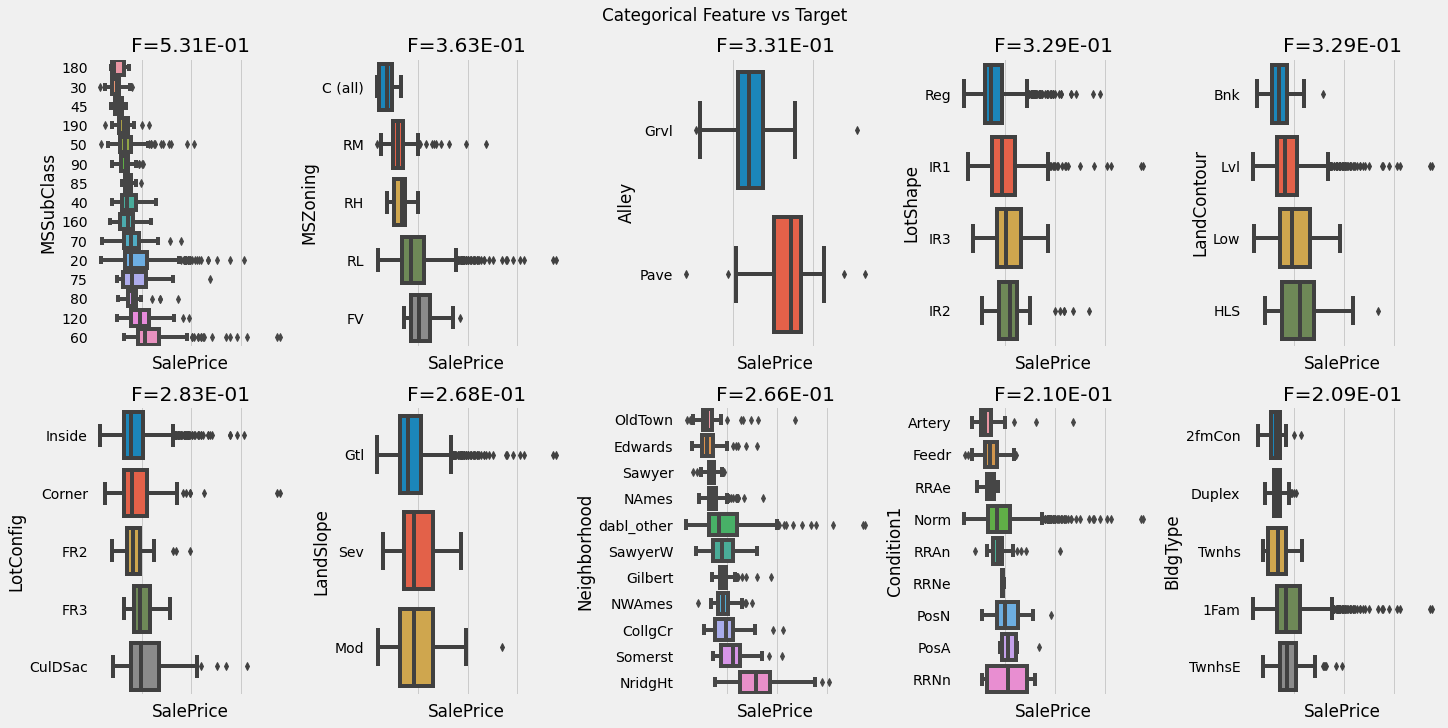

In [4]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

import dabl
dabl.plot(data, target_col = 'SalePrice')

In [5]:
# let's check the columns in the dataset
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Statistical Inference

### Sample Mean and population Mean

Consider a sample of 500 houses at random from 1460 houses and plot it's mean.
But the mean of these 500 houses can be near or far away from the mean of the 1460 houses.

In [6]:
# lets take seed so that everytime the random values come out to be constant
np.random.seed(6)

# lets take 500 sample values from the dataset of 1460 values
sample_ages = np.random.choice(a= data['SalePrice'], size=500)

# getting the sample mean
print ("Sample mean:", sample_ages.mean() )          

# getting the population mean
print("Population mean:", data['SalePrice'].mean())

Sample mean: 177499.802
Population mean: 180921.19589041095


### Central Limit Theorem

The central limit theorem (CLT) is a statistical theory that states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population. Furthermore, all of the samples will follow an approximate normal distribution pattern, with all variances being approximately equal to the variance of the population divided by each sample's size.

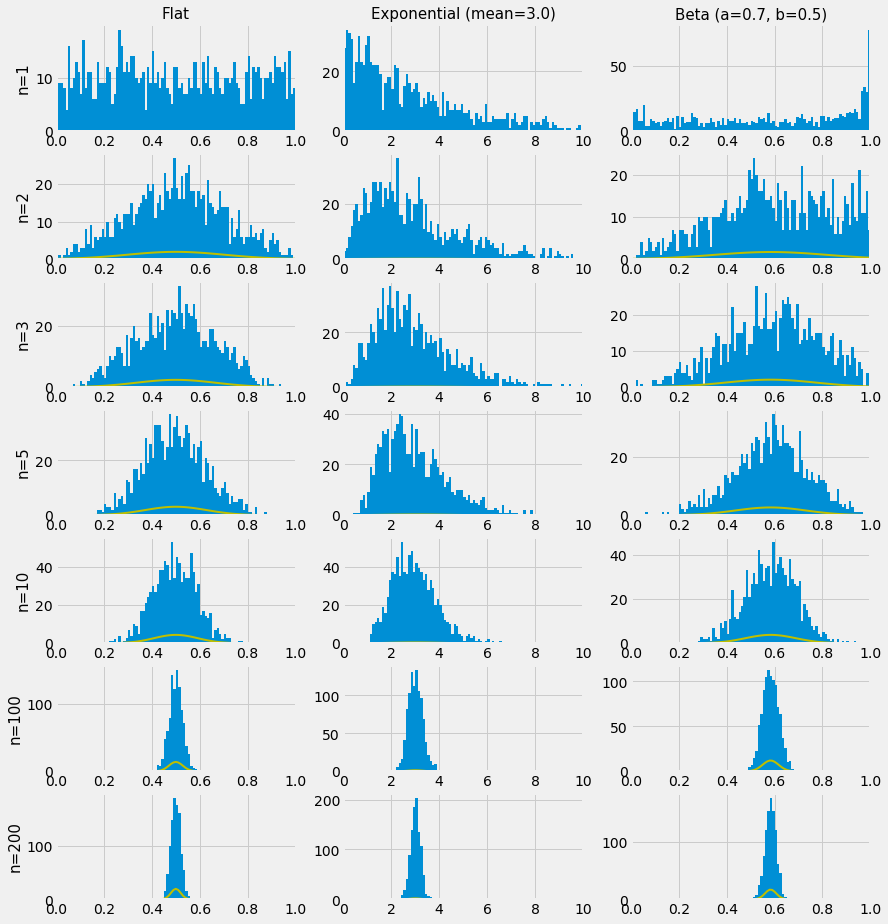

In [7]:

# provides capability to define function with partial arguments
from functools import partial

# number of samples to average over.
n=np.array([1, 2, 3, 5, 10, 100, 200])

# number of times samples of size n are taken. Try varying this number.
N = 1000

# number of bin boundaries on plots
nobb=101

# mean of exponential distribution
exp_mean=3

# parameters of beta distribution
a,b=0.7,0.5 

dist=[partial(np.random.random), 
      partial(np.random.exponential, exp_mean),
      partial(np.random.beta, a, b)]

# lets define the title names.
title_names=["Flat",
             "Exponential (mean=%.1f)" % exp_mean, 
             "Beta (a=%.1f, b=%.1f)" % (a,b)]

# ranges of the three distributions
drange=np.array([[0,1],[0,10],[0,1]]) 

# means of the three distributions
means=np.array([0.5,exp_mean,a/(a+b)])

# variances of the three distributions
var=np.array([1/12,exp_mean**2,a*b/((a+b+1)*(a+b)**2)]) 

# generates random samples in the specified ranges for the respective distributions.
binrange=np.array([np.linspace(p,q,nobb) for p,q in drange]) 
ln,ld=len(n),len(dist)
plt.figure(figsize=((ld*4)+1,(ln*2)+1))

 # loop over number of n samples to average over
for i in range(ln):
     # loop over the different distributions
    for j in range(ld):
        plt.subplot(ln,ld,i*ld+1+j)
        plt.hist(np.mean(dist[j]((N,n[i])),1),binrange[j])
        plt.xlim(drange[j])
        if j==0:
            plt.ylabel('n=%i' % n[i],fontsize=15)        
        if i==0:
            plt.title(title_names[j], fontsize=15)
        else:
            clt=(1/(np.sqrt(2*np.pi*var[j]/n[i])))*np.exp(-(((binrange[j]-means[j])**2)*n[i]/(2*var[j])))
            plt.plot(binrange[j],clt,'y',linewidth=2)     
plt.show()

In the graphs above the yellow curve is the predicted Gaussian distribution from the Central Limit Thereom. The rate of convergence of the sample mean to the Gaussian depends on the original parent distribution. 

Also, the mean of Gaussian distribution is the same as the original parent distribution, the width of Gaussian distribution varies with sample size as  1/√n .

### Confidence Interval

Confidence Interval (CI) is a type of estimation computed from the statistics of the observed data. This proposes the range of plausible values for an unknown parameter (for example, the mean). The interval has got an associated confidence level that the true parameter is in the proposed range.

**Z-Score** : The number of standard deviations from the mean is also called the "Standard Score", "sigma" or "z-score".

In [8]:
# lets import the scipy package
import scipy.stats as stats
import math

# lets seed the random values
np.random.seed(10)

# lets take a sample size
sample_size = 1000
sample = np.random.choice(a= data['SalePrice'],
                          size = sample_size)
sample_mean = sample.mean()

# Get the z-critical value*
z_critical = stats.norm.ppf(q = 0.95)  

 # Check the z-critical value  
print("z-critical value: ",z_critical)                                

# Get the population standard deviation
pop_stdev = data['SalePrice'].std()  

# checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# lets print the results
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['SalePrice'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (178338.05201966673, 186602.42998033328)
True mean: 180921.19589041095


The true mean is contained in our interval.
A confidence interval of 95% would mean that if we take many samples and create confidence intervals for each of them, 95% of our samples' confidence intervals will contain the true population mean.
Let's create several confidence intervals and plot them to get a better sense of what it means to "capture" the true mean.

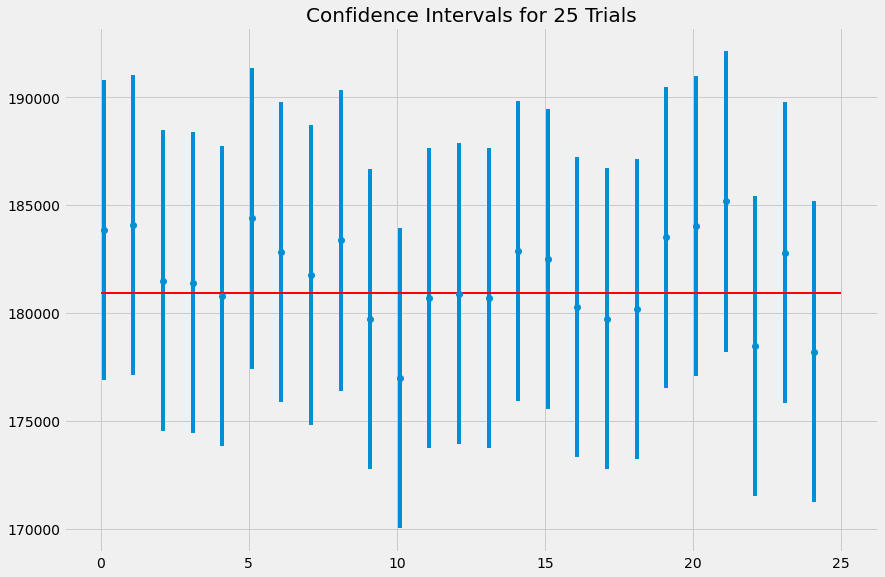

In [9]:

sample_size = 500

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= data['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

     # Get the z-critical value* 
    z_critical = stats.norm.ppf(q = 0.975)         

    # Get the population standard deviation
    pop_stdev = data['SalePrice'].std()  

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    

plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 25 Trials', fontsize = 20)
plt.show()


## Probability

**Probability can roughly be described as the chance of an event or sequence of events occurring.**

**Experiment** is the uncertain situation, which could have multiple outcomes. A coin toss is an experiment.

**Outcome** is the result of a single trial. So, if head lands, the outcome of or coin toss experiment is “Heads”

**Event** is one or more outcomes from an experiment. “Tails” is one of the possible events for this experiment.

The probability of at least 1 of 2 (or more) things that can not simultaneously occur (mutually exclusive) is the sum of their respective probabilities.

Mutually exclusive is a statistical term describing two or more events that cannot occur simultaneously. For example, it is impossible to roll a five and a three on a single die at the same time.

For any 2 events A & B, the probability that at least one occurs is the sum of their individual probabilities minus the probability of their intersection. i.e

**P(A ∪ B) = P(A) + P(B) − P(A ∩ B)** 

### Basic Probability

Probability of picking a house in the Neighborhood - "OldTown" = 
**No. of houses in OldTown / Total no. of houses** 

In [10]:
# lets check the different neighborhoods
data['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [11]:
# total number of houses in the neighborhood
all_houses = data.shape[0]
print("Total Number of Houses in the Neighborhood :", all_houses)

Total Number of Houses in the Neighborhood : 1460


In [12]:
# total number of houses in the Old town neighborhood
houses_in_OldTown = data[data['Neighborhood'] == 'OldTown'].shape[0]
print("Total Number of Houses in the Old Town Road :", houses_in_OldTown)

Total Number of Houses in the Old Town Road : 113


In [13]:
# lets find the probability of picking a House in the Old Town
probability = (houses_in_OldTown/all_houses)*100
print('Probability of picking a house in OldTown: ',probability,'%')

Probability of picking a house in OldTown:  7.739726027397261 %


### Conditional Probability

Conditional probability is a measure of the probability of an event occurring, given that another event has already occurred. 

If the event of interest is A and the event B is known or assumed to have occurred, "the conditional probability of A given B", or "the probability of A under the condition B", is usually written as P(  A / B).

**GIVEN that we have the probability of picking a house in "OldTown" neighborhood, we go a step further and AGAIN pick a house from the SAME neighborhood ?**

In [14]:
## condtional probability code
cond_prob = (houses_in_OldTown/all_houses) * ((houses_in_OldTown - 1)/(all_houses - 1)) 
print("The Probability of Picking a House in Old Town and again picking a house from the same neighborhood is ",cond_prob*100)

The Probability of Picking a House in Old Town and again picking a house from the same neighborhood is  0.5941393523430385


### Normal Distrution

Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution appears as a bell curve.

Askewness in the Target Columns of the data.
Skewness is the state of distribution where the distribution is highly biased towards the right or left side of the plot.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


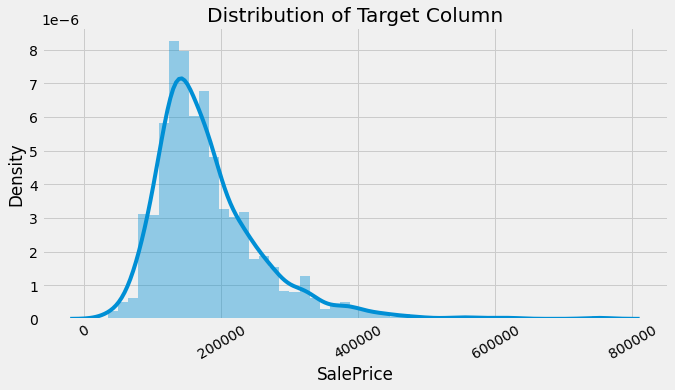

In [15]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

plt.xticks(rotation=30)
sns.distplot(data['SalePrice'])
plt.title('Distribution of Target Column')
plt.show()

The distribution for our target variable SalePrice doesn't resemble a normal distribution, as it is skewed to the right.
If we remove the outliers, it will resemble a Normal Dstribution.

### P Value

In statistical hypothesis testing, the p-value or probability value is the probability of obtaining test results at least as extreme as the results actually observed during the test, assuming that the null hypothesis is correct.

So now say that we have put a significance (α) = 0.05

This means that if we see a p-value of lesser than 0.05, we reject our Null and accept the Alternative to be true

**Are house prices in OldTown really different from the House Prices of Other Neighborhoods?**

In [16]:
# lets import z test from statsmodels
from statsmodels.stats.weightstats import ztest

z_statistic, p_value = ztest(x1 = data[data['Neighborhood'] == 'OldTown']['SalePrice'],
                             value = data['SalePrice'].mean())

# lets print the Results
print('Z-statistic is :{}'.format(z_statistic))
print('P-value is :{:.50f}'.format(p_value))

Z-statistic is :-10.639294263334575
P-value is :0.00000000000000000000000001956052602626001826532572


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
